In [1]:
%%capture
! git clone https://github.com/adrianstando/plaster-damage-detection.git
! cp -r plaster-damage-detection ./plaster_damage_detection/

In [2]:
import cv2
import torch
import numpy as np

image_path = 'img.png'
image = cv2.imread(image_path).astype(np.float32) / 255.0
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
image.shape

(960, 1280, 3)

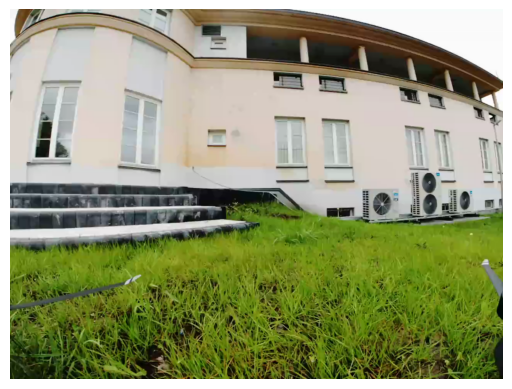

In [4]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
from plaster_damage_detection.src.srgan import SRGAN

srgan = SRGAN()

In [6]:
with torch.no_grad():
    img_upscaled = srgan(image)

In [7]:
im_test = img_upscaled.half().squeeze(0).permute(1, 2, 0).mul(255).clamp(0, 255).cpu().numpy().astype("uint8")

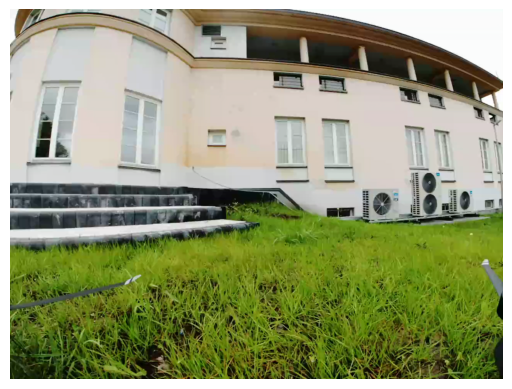

In [8]:
plt.imshow(im_test)
plt.axis('off')
plt.show()

In [9]:
im_test.shape

(3840, 5120, 3)